### Thresholding techniques using OpenCV

Thresholding is a technique in OpenCV, which is the assignment of pixel values in relation to the threshold value provided. In thresholding, each pixel value is compared with the threshold value. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255). Thresholding is a very popular segmentation technique, used for separating an object considered as a foreground from its background. A threshold is a value which has two regions on its either side i.e. below the threshold or above the threshold.

In Computer Vision, this technique of thresholding is done on grayscale images. So initially, the image has to be converted in grayscale color space.

If f (x, y) < T 
   then f (x, y) = 0 
else 
   f (x, y) = 255

where 
f (x, y) = Coordinate Pixel Value
T = Threshold Value.

In OpenCV with Python, the function cv2.threshold is used for thresholding.

<b>Syntax:</b> cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique) 

<b>Parameters:</b>

 - source: Input Image array (must be in Grayscale). 
 - thresholdValue: Value of Threshold below and above which pixel values will change accordingly. 
 - maxVal: Maximum value that can be assigned to a pixel. 
 - thresholdingTechnique: The type of thresholding to be applied.

#### Simple Thresholding

The basic Thresholding technique is Binary Thresholding. For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value.
The different Simple Thresholding Techniques are:

 - <b>cv2.THRESH_BINARY:</b> If pixel intensity is greater than the set threshold, value set to 255, else set to 0 (black).
 - <b>cv2.THRESH_BINARY_INV:</b> Inverted or Opposite case of cv2.THRESH_BINARY.
 - <b>cv.THRESH_TRUNC:</b> If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same.
 - <b>cv.THRESH_TOZERO:</b> Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.
 - <b>cv.THRESH_TOZERO_INV:</b> Inverted or Opposite case of cv2.THRESH_TOZERO.

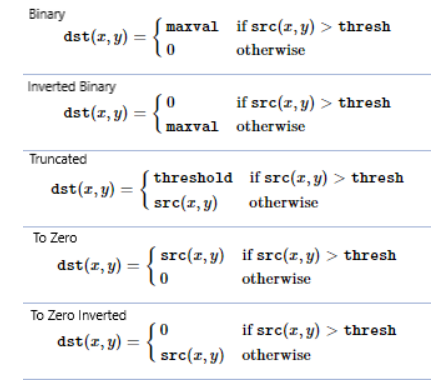

In [2]:
import cv2
import numpy as np

In [6]:
# read the image in grayscale
image = cv2.imread("flower.png", 0)

# applying different thresholding techniques on the input image all pixels value above 120 will be set to 255 
ret, thresh1 = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY) 
ret, thresh2 = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY_INV) 
ret, thresh3 = cv2.threshold(image, 120, 255, cv2.THRESH_TRUNC) 
ret, thresh4 = cv2.threshold(image, 120, 255, cv2.THRESH_TOZERO) 
ret, thresh5 = cv2.threshold(image, 120, 255, cv2.THRESH_TOZERO_INV)

# the window showing output images with the corresponding thresholding techniques applied to the input images 
cv2.imshow('Binary Threshold', thresh1) 
cv2.imshow('Binary Threshold Inverted', thresh2) 
cv2.imshow('Truncated Threshold', thresh3) 
cv2.imshow('Set to 0', thresh4) 
cv2.imshow('Set to 0 Inverted', thresh5)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Adaptive Thresholding

Another Thresholding technique is Adaptive Thresholding. In Simple Thresholding, a global value of threshold was used which remained constant throughout. So, a constant threshold value won’t help in the case of variable lighting conditions in different areas. Adaptive thresholding is the method where the threshold value is calculated for smaller regions. This leads to different threshold values for different regions with respect to the change in lighting. We use cv2.adaptiveThreshold for this.

<b>Syntax:</b> cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant) 

<b>Parameters:</b> 

 - source: Input Image array(Single-channel, 8-bit or floating-point) 
 - maxVal: Maximum value that can be assigned to a pixel. 
 - adaptiveMethod: Adaptive method decides how threshold value is calculated.  
    - cv2.ADAPTIVE_THRESH_MEAN_C: Threshold Value = (Mean of the neighbourhood area values – constant value). In other words, it is the mean of the blockSize×blockSize neighborhood of a point minus constant. 
    - cv2.ADAPTIVE_THRESH_GAUSSIAN_C: Threshold Value = (Gaussian-weighted sum of the neighbourhood values – constant value). In other words, it is a weighted sum of the blockSize×blockSize neighborhood of a point minus constant. 
 - thresholdType: The type of thresholding to be applied. 
 - blockSize: Size of a pixel neighborhood that is used to calculate a threshold value. 
 - constant: A constant value that is subtracted from the mean or weighted sum of the neighbourhood pixels.

In [5]:
# read input image in grayscale
image = cv2.imread("flower.png", 0)

# applying different thresholding techniques on the input image 
thresh1 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5) 
  
thresh2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 199, 5)

# the window showing output images with the corresponding thresholding techniques applied to the input image 
cv2.imshow('Adaptive Mean', thresh1) 
cv2.imshow('Adaptive Gaussian', thresh2)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Otsu Thresholding

In Otsu Thresholding, a value of the threshold isn’t chosen but is determined automatically. A bimodal image (two distinct image values) is considered. The histogram generated contains two peaks. So, a generic condition would be to choose a threshold value that lies in the middle of both the histogram peak values. We use the Traditional cv2.threshold function and use cv2.THRESH_OTSU as an extra flag.

<b>Syntax:</b> cv2.threshold(source, thresholdValue, maxVal, thresholdingTechnique) 

<b>Parameters:</b>

 - source: Input Image array (must be in Grayscale). 
 - thresholdValue: Value of Threshold below and above which pixel values will change accordingly. 
 - maxVal: Maximum value that can be assigned to a pixel. 
 - thresholdingTechnique: The type of thresholding to be applied.

In [7]:
# read input image in grayscale
image = cv2.imread("flower.png", 0)

# applying Otsu thresholding as an extra flag in binary thresholding      
ret, thresh1 = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# the window showing output image with the corresponding thresholding techniques applied to the input image     
cv2.imshow('Otsu Threshold', thresh1)

cv2.waitKey(0)
cv2.destroyAllWindows()